#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  # used to supress display of warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

***

### EDA

In [3]:
df.shape 

(5000, 14)

- The dataset has 5000 rows and 14 columns

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4794,4795,56,30,29,94110,4,1.5,3,146,0,0,0,0,0
4044,4045,36,11,9,90266,2,0.3,2,99,0,1,0,0,0
3736,3737,54,30,78,96001,3,1.8,2,0,0,0,0,0,0
1583,1584,61,36,184,92028,4,2.3,2,342,1,0,1,1,1
2894,2895,49,25,19,94545,1,0.9,3,0,0,0,0,0,0
999,1000,60,35,18,92120,1,1.5,2,0,0,0,0,1,1
3794,3795,52,27,39,92612,4,0.2,2,0,0,1,0,1,0
4228,4229,34,10,83,95060,2,2.0,2,148,0,0,0,0,0
524,525,24,-1,75,93014,4,0.2,1,0,0,0,0,1,0
359,360,32,6,32,93106,1,1.9,3,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.groupby('Personal Loan').ID.count()

Personal Loan
0    4520
1     480
Name: ID, dtype: int64

***

**Univariate Analysis**

In [8]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- It can be seen that the 'Experience' column has its min value as negative. This isn't practically possible, so we'll have to replace these values with 0.   


In [9]:
# defining a function for summary statistics

def summary_stats(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    mode= dataset.mode().iloc[0]
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2) 
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    df_range=max_value - min_value
    iqr = np.round(quartile_3 - quartile_1, 2) # Interquartile range
    print('Mean: %s' % mean)
    print('Min: %s' % min_value)
    print('Q1 (25th percentile): %s' % quartile_1)
    print('Q2 (Median): %s' % median)
    print('Q3 (75th percentile): %s' % quartile_3)
    print('Max: %s' % max_value)
    print('Range(=Max-Min) : %s' % df_range)
    print('Interquartile range (IQR=Q3-Q1): %s' % iqr)
    print('Mode: %s' % mode)

In [10]:
summary_stats(df['Age'])

Mean: 45.34
Min: 23
Q1 (25th percentile): 35.0
Q2 (Median): 45.0
Q3 (75th percentile): 55.0
Max: 67
Range(=Max-Min) : 44
Interquartile range (IQR=Q3-Q1): 20.0
Mode: 35


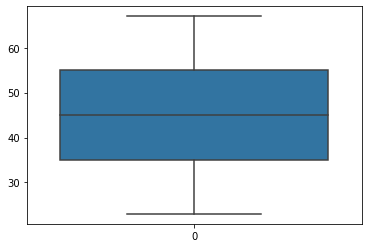

In [11]:
sns.boxplot(data=df['Age']);

- The average age of customers in given dataset is 45 years.
- No outliers present

In [12]:
summary_stats(df['Experience'])

Mean: 20.1
Min: -3
Q1 (25th percentile): 10.0
Q2 (Median): 20.0
Q3 (75th percentile): 30.0
Max: 43
Range(=Max-Min) : 46
Interquartile range (IQR=Q3-Q1): 20.0
Mode: 32


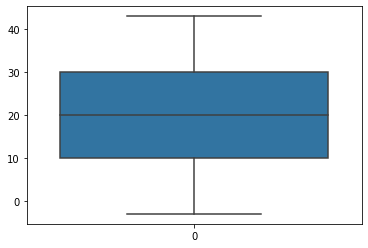

In [13]:
sns.boxplot(data=df['Experience']);

- The customers have an average professional experience of 20 years.
- The negative values need to be treated & replaced with 0.
- No outliers present


In [14]:
summary_stats(df['Income'])

Mean: 73.77
Min: 8
Q1 (25th percentile): 39.0
Q2 (Median): 64.0
Q3 (75th percentile): 98.0
Max: 224
Range(=Max-Min) : 216
Interquartile range (IQR=Q3-Q1): 59.0
Mode: 44


In [15]:
# 90th, 95th, 99th percentiles for Income

df['Income'].quantile(q=[.90, .95, .99])

0.90    145.0
0.95    170.0
0.99    193.0
Name: Income, dtype: float64

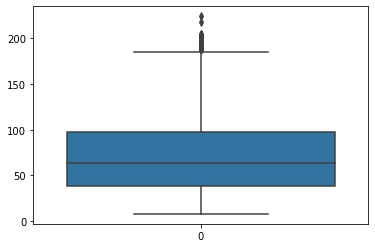

In [16]:
sns.boxplot(data=df['Income']);

- The average annual income of customers is USD 73k
- 75% of customers have income less than 100k
- Outliers present

In [17]:
summary_stats(df['CCAvg'])

Mean: 1.94
Min: 0.0
Q1 (25th percentile): 0.7
Q2 (Median): 1.5
Q3 (75th percentile): 2.5
Max: 10.0
Range(=Max-Min) : 10.0
Interquartile range (IQR=Q3-Q1): 1.8
Mode: 0.3


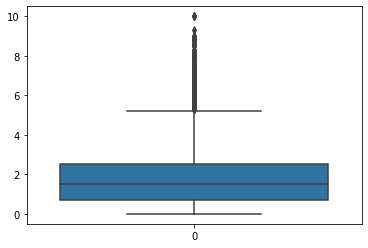

In [18]:
sns.boxplot(data=df['CCAvg']);

- The average credit card spending is USD 2k
- However, there are a few customers spending even higher than 5k with max amount being 10k (these values can be seen as outliers in the box plot). 

In [19]:
summary_stats(df['Mortgage'])

Mean: 56.5
Min: 0
Q1 (25th percentile): 0.0
Q2 (Median): 0.0
Q3 (75th percentile): 101.0
Max: 635
Range(=Max-Min) : 635
Interquartile range (IQR=Q3-Q1): 101.0
Mode: 0


In [20]:
# percentiles for Mortgage

df['Mortgage'].quantile(q=[.80, .85, .90, .95, .99])

0.80    123.00
0.85    155.00
0.90    200.00
0.95    272.00
0.99    431.01
Name: Mortgage, dtype: float64

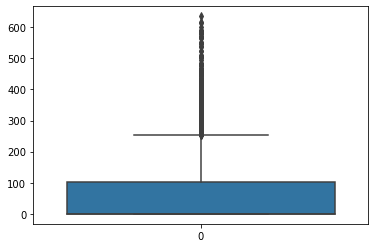

In [21]:
sns.boxplot(data=df['Mortgage']);

- The median value is 0
- The presence of high outlier values in mortgage can be seen

In [22]:
num=['Age','Experience','Income','CCAvg','Mortgage']

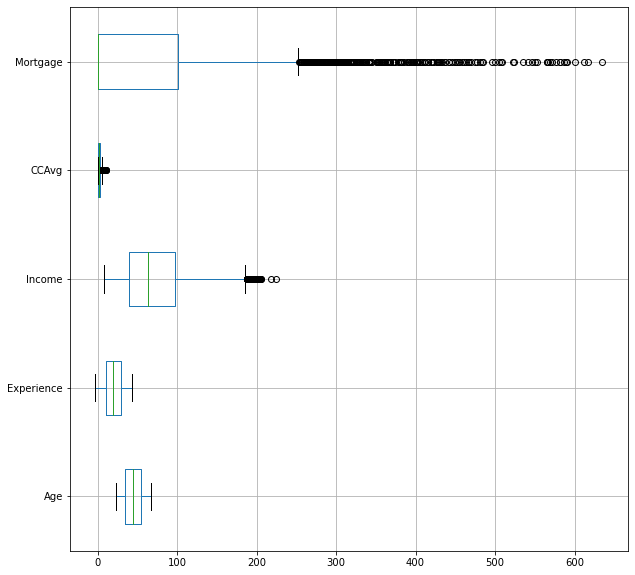

In [23]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

***

**Outlier Treatment**

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in ['Mortgage','Income','CCAvg']:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

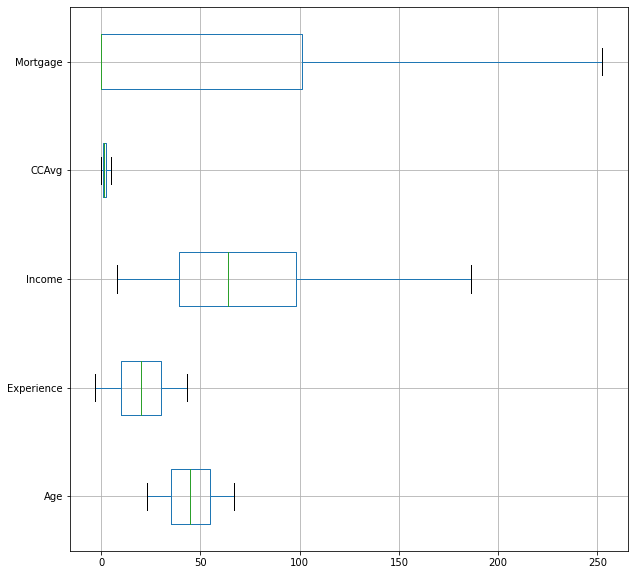

In [26]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

- Continuous variables are now free from any outliers

***

**Check missing/wrong values**

In [27]:
# Check for null/NaN values

df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- No null values present 

In [28]:
# Check for inf values
count = np.isinf(df).values.sum()
print(count)

0


- No inf values present 

In [29]:
dups=df.duplicated()
dups.sum()

0

- No duplicate values present

In [30]:
# Checking for columns having negative values 
(df < 0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

- Only Experience column has negative values

In [31]:
# Number of negative values
(df < 0).values.sum()

52

In [32]:
# Replacing negative values with 0

df[df < 0]=0

In [33]:
# Check
(df < 0).values.sum()

0

In [34]:
# Check
(df < 0).any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

***

**Correlation Analysis** 

In [35]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.018038,0.013432,-0.016797,-0.018064,0.021463,-0.017456,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.054988,-0.029216,-0.046418,-0.052032,0.041334,-0.012033,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046429,-0.028783,-0.052213,-0.050544,0.013536,-0.010807,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.018038,-0.054988,-0.046429,1.000000,-0.016552,-0.157593,0.637869,-0.187403,0.135018,0.504559,-0.002549,0.170194,0.014099,-0.002474
ZIP Code,0.013432,-0.029216,-0.028783,-0.016552,1.000000,0.011778,-0.005181,-0.017377,0.008913,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157593,0.011778,1.000000,-0.103234,0.064929,-0.010862,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.018064,-0.052032,-0.050544,0.637869,-0.005181,-0.103234,1.000000,-0.126476,0.068329,0.383306,0.020487,0.143221,-0.003920,-0.006538
Education,0.021463,0.041334,0.013536,-0.187403,-0.017377,0.064929,-0.126476,1.000000,-0.022005,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.017456,-0.012033,-0.010807,0.135018,0.008913,-0.010862,0.068329,-0.022005,1.000000,0.092989,-0.005577,0.069331,-0.007161,-0.003484
Personal Loan,-0.024801,-0.007726,-0.007858,0.504559,0.000107,0.061367,0.383306,0.136722,0.092989,1.000000,0.021954,0.316355,0.006278,0.002802


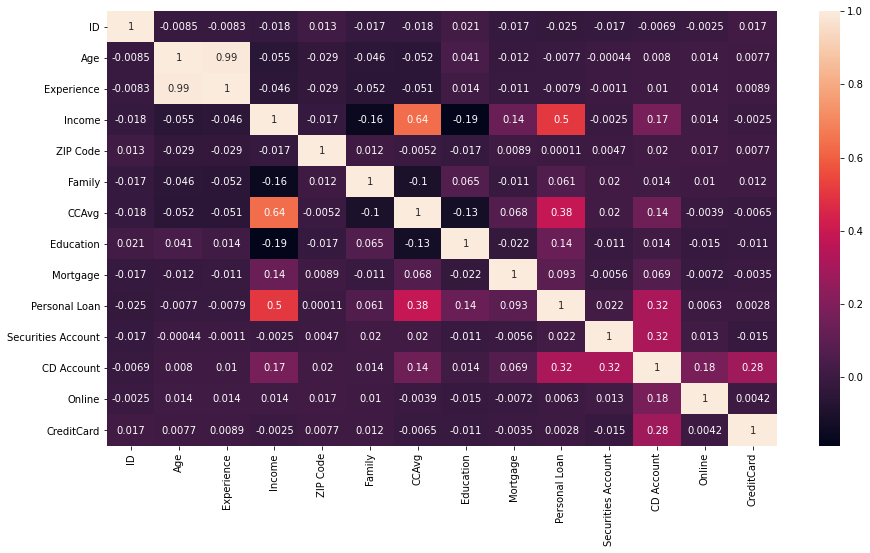

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Age & Experience are highly correlated (0.994) and thus one of them can be dropped while modelling.
- Income and CCAvg have a moderate correlation (0.646).

**Pairplots**

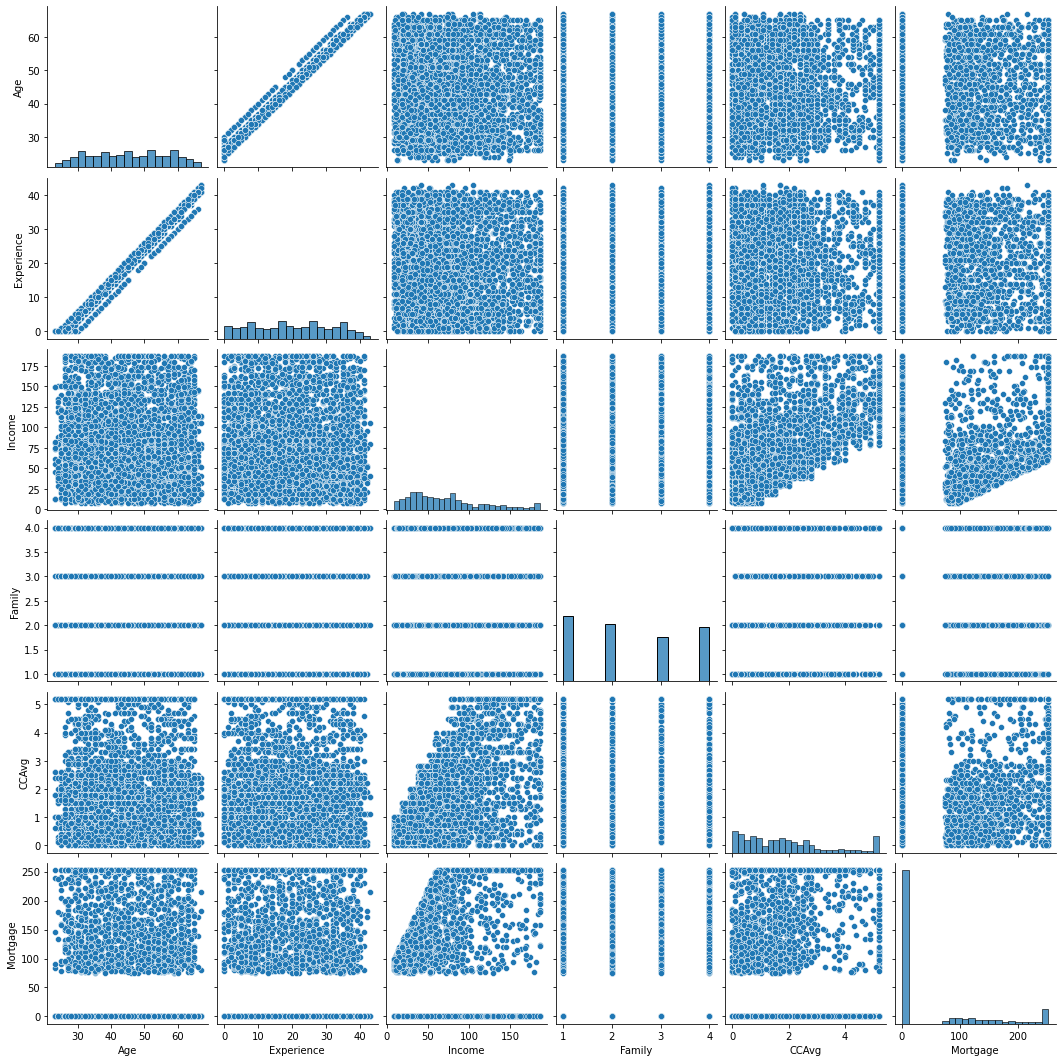

In [37]:
sns.pairplot(df.loc[:,['Age','Experience','Income','Family','CCAvg','Mortgage']]);

- Strong linear correlation can be seen between Age and Experience variables.

***

**One-Hot Encoding 'Education' variable**


In [38]:
df=pd.get_dummies(df, columns=['Education'])
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49.0,91107,4,1.6,0.0,0,1,0,0,0,1,0,0
1,2,45,19,34.0,90089,3,1.5,0.0,0,1,0,0,0,1,0,0
2,3,39,15,11.0,94720,1,1.0,0.0,0,0,0,0,0,1,0,0
3,4,35,9,100.0,94112,1,2.7,0.0,0,0,0,0,0,0,1,0
4,5,35,8,45.0,91330,4,1.0,0.0,0,0,0,0,1,0,1,0


***

**Separating the data into dependant & independent variables and creating training and test sets**

In [39]:
#target variable
y=df['Personal Loan']

#independent variables

X=df[['Age','Income','ZIP Code','Family','CCAvg','Mortgage','Securities Account',
      'CD Account','Online','CreditCard','Education_1','Education_2']] 
# Excluding 'Experience' as Age & Experience both are correlated
# Excluding Education_3 as it is redundant

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)  


***

**Using StandardScaler( ) from sklearn to transform the training and test data into scaled values**

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scalar=sc.fit(X_train) 
# fitting the StandardScaler object to the train data and transform train and test data using this object

X_train_sd = scalar.transform(X_train)

X_test_sd = scalar.transform(X_test)

***

**Creating a function which takes a model, X_train, X_test, y_train and y_test as input and returns the metrics : accuracy, 
recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set**

In [41]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    model.fit(X_train, y_train)
    
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    
    pred = model.predict(X_test)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    
    # CONFUSION MATRIX 
    from sklearn import metrics
    
    cm = metrics.confusion_matrix(y_test, pred)
    
    # Creating a function to report specificity
    def confusion_metrics (cm):

        TP = cm[1][1] 
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
    
        specificity = (TN / float(TN + FP))
        return specificity

    specificity = confusion_metrics(cm)
 
    return test_accuracy, train_accuracy, precision, recall, specificity, f1

**Employing multiple Classification models (Logistic, K-NN, Naïve Bayes, SVM)**


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.svm import SVC
svm = SVC()



**Creating a dataframe for evaluating different models' metrics**


In [43]:
result = pd.DataFrame(columns=['test_accuracy', 'train_accuracy', 'precision', 'recall','specificity', 'f1'])

for name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'], [lr, knn, nb, svm]):
                       
    result.loc[name,:] = fit_n_print(model, X_train_sd, X_test_sd, y_train, y_test)

In [44]:
result

,test_accuracy,train_accuracy,precision,recall,specificity,f1
Logistic Regression,0.955333,0.965429,0.882353,0.664557,0.989568,0.758123
KNN,0.952667,0.970286,0.948454,0.582278,0.996274,0.721569
Naive Bayes,0.912667,0.910857,0.574586,0.658228,0.942623,0.613569
SVM,0.968667,0.984857,0.944,0.746835,0.994784,0.833922


***

**MODEL SELECTION**

From above results, we can draw a few inferences :
- SVM model shows the best accuracy amongst all models
- KNN and Logistic regression models have good accuracy but lower recall/precision scores than SVM


But, before choosing the best model just on the basis of accuracy, we need to look at confusion matrix for all models

In [45]:
for name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'], [lr, knn, nb, svm]):
                       
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, pred)
    
    cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

    display( name , cm_df)
    print('\n')

'Logistic Regression'

,Predicted Negative,Predicted Positive
Actual Negative,1301,41
Actual Positive,109,49


'KNN'

,Predicted Negative,Predicted Positive
Actual Negative,1303,39
Actual Positive,116,42


'Naive Bayes'

,Predicted Negative,Predicted Positive
Actual Negative,1263,79
Actual Positive,54,104


'SVM'

,Predicted Negative,Predicted Positive
Actual Negative,1342,0
Actual Positive,158,0


- We can see from above results that SVM model has completely failed in predicting any positives. So, it is not the correct model.
- Since the bank wants to predict the customers who will take a personal loan, **our aim is to target the correct customers at minimum campaign costs.**
- To do this, we don’t want to do an expensive campaign directed towards a non-target audience. Thus, we should minimize the false positives.This will ensure that we do not incur costs by targeting wrong customers. In this case, False negatives do not have associated costs.
- As a result, we might not address the entire target group, but those we address are most likely in the target group and will opt for loan.


- So, amongst LR and KNN model, we should look for model having higher precision. In this case, it is KNN model. High precision indicates that most of the customers predicted by this model will take a personal loan.
- Overall, logistic regression model’s performance is better than KNN as indicated by F1 score.  
- **Hence for our business case, KNN model will prove to more cost effective and target the right customers. So, it is the best model.**

***